# Two-Factor Gasforward model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rivapy.models.gas_fwd_model import GasFwdModel2Factor

%load_ext autoreload
%autoreload 2

/home/doeltz/doeltz/development/RiVaPy/rivapy/__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')
/home/doeltz/anaconda3/envs/aifa/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-27 17:13:28.838481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-27 17:13:28.838498: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [51]:
model = GasFwdModel2Factor(
                vol1=0.1, 
                 alpha1=0.1,#5.0, 
                 vol2 = 0.5, 
                 alpha2 = 1.0,
                 corr = 0.9,#0.5,
                 S0 = 100,
                 udl='TTF')

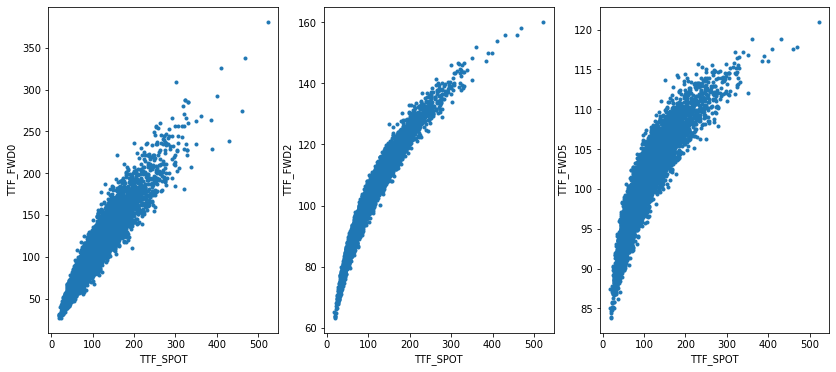

In [57]:
timegrid = np.linspace(0.0,1.0,365)
expiries=[0.5,1.5,2.0,3.0,4.0,5.0]
rnd = np.random.normal(size=model.rnd_shape(n_sims=10_000, n_timesteps=timegrid.shape[0]))
simulated_values = model.simulate(timegrid, rnd, expiries=expiries, 
                                  fwd0=[100]*len(expiries))
time = 200
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
plt.plot(simulated_values.get('TTF_SPOT')[time,:], simulated_values.get('TTF_FWD0')[time,:],'.')
plt.xlabel('TTF_SPOT')
plt.ylabel('TTF_FWD0')
plt.subplot(1,3,2)
plt.plot(simulated_values.get('TTF_SPOT')[time,:], simulated_values.get('TTF_FWD2')[time,:],'.')
plt.xlabel('TTF_SPOT')
plt.ylabel('TTF_FWD2')
plt.subplot(1,3,3)
plt.plot(simulated_values.get('TTF_SPOT')[time,:], simulated_values.get('TTF_FWD5')[time,:],'.')
plt.xlabel('TTF_SPOT')
plt.ylabel('TTF_FWD5');

In [ ]:
plt.plot(simulated_values.get('TTF_SPOT')[time,:], simulated_values.get('TTF_FWD0')[time,:],'.')

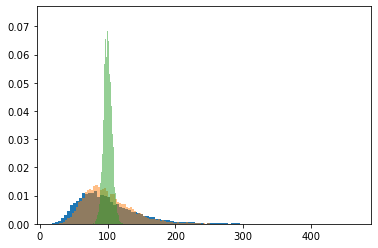

In [55]:
plt.hist(simulated_values.get('TTF_SPOT')[time,:], bins=100, density=True)
plt.hist(simulated_values.get('TTF_FWD0')[time,:], bins=100, alpha=0.5, density=True);
plt.hist(simulated_values.get('TTF_FWD4')[time,:], bins=100, alpha=0.5, density=True);

In [5]:
simulated_values.get('TTF_SPOT').shape

(365, 10000)

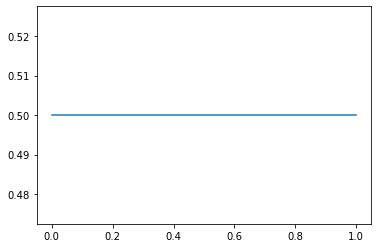

In [6]:
vols = model._compute_vol_grids(timegrid, expiries=expiries)
plt.plot(timegrid, vols[:,0,-1]);

In [7]:
simulated_values.[time,i,:]

SyntaxError: invalid syntax (1117705817.py, line 1)

In [ ]:
simulated_values.n_forwards()

In [ ]:
from scipy.linalg import cholesky
upper_chol = cholesky(np.array([[1.0,0.5],[0.5,1.0]]))

In [ ]:
rnd[0,:,:] @ upper_chol 

In [ ]:
depp =rnd[0,:,:] @ upper_chol 
depp.shape

In [ ]:
plt.plot(depp[:,0], depp[:,1],'.')